In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [2]:
class Bacteria():

    def __init__(self, name, antibiotic, AMR = 0, number = 100000):
        self.bacteria_name = name
        self.bacteria_number = number
        self.AMR = AMR
        self.antibiotic = antibiotic
        self.antibitotic_possible_for_treatment = {'E.coli':'amoxicillin', 'Salmonella':'metronidazole'}
        self.chance_to_develope_AMR = {'amoxicillin':15, 'metronidazole':5, 'colistin' : 25}
        self.treatment = {'amoxicillin':6, 'metronidazole':12, 'colistin' : 24}
        self.speed_of_growth = {'E.coli':1.3, 'Salmonella':1.13}
        
    def development_of_AMR(self):
        chance = random.randint(0,self.chance_to_develope_AMR[self.antibiotic])
        self.AMR = (self.bacteria_number - self.AMR)*chance + self.AMR
        return self.AMR
        
    def infection_treatment(self):
        if self.antibiotic != self.antibitotic_possible_for_treatment[self.bacteria_name]:
            return 'Choose another treatment, as this one is not suitable'
        else:
            self.bacteria_number = (self.bacteria_number - self.AMR)*0.5 + self.AMR
            return self.bacteria_number
                        
    def bacterial_grows(self):
        self.bacteria_number = self.bacteria_number*self.speed_of_growth[self.bacteria_name]
        return self.bacteria_number
        
    def model(self):
        treatment=1
        self.infection_treatment()
        self.development_of_AMR()
        for i in range(168): # hour in one week of treatment
            self.bacterial_grows()
            if i % self.treatment[self.antibiotic]==0:
                treatment+=1
                self.infection_treatment()
                self.development_of_AMR()
        if self.bacteria_number/self.AMR>=0.8:
            print('We have to treat with last line antibiotics')
        elif 0.4<self.bacteria_number/self.AMR<0.8:
            print('We have to choose other antibiotic')
        else:
            print('Patient is going to recover soon')
        
                
                    

In [3]:
amr_risks = Bacteria('E.coli','amoxicillin')
amr_risks.model()



We have to treat with last line antibiotics


In [4]:
class RNA():

    def __init__(self, rna):
        self.rna_seq = Seq(rna)
    
    def traslation(self):
        return str(self.rna_seq.translate())
        
    def reversed_transcription(self):
        return str(self.rna_seq.back_transcribe())
        

Test

In [5]:
rna = RNA('UACGGTcguac')
print(rna.traslation())
print(rna.reversed_transcription())

YGR
TACGGTcgtac


/Users/vana0005/opt/anaconda3/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [6]:
class PositiveSet(set):
    
    def __init__(self, set_):
        self.set_ = set_
        self.positive_set = set()
        for ele in self.set_:
            if ele > 0:
                self.positive_set.add(ele)
        
    def add(self, *elements):
        for ele in elements:
            if ele > 0:
                self.positive_set.add(ele)
        return set(self.positive_set)
        
    
        

Test

In [7]:
test_list = (1,3,4,5,-4,6,-7,10)
test = set(test_list)
new_set = PositiveSet(test)
new_new_set = new_set.add(1,2,-3,4,-31,24,-56,12)
print(new_new_set)

{1, 2, 3, 4, 5, 6, 10, 12, 24}


In [8]:
class FastaStatistics():
    
    def __init__(self,path):
        self.path = path
        
    def sequences_number(self):
        return len([1 for line in open(self.path) if line.startswith(">")])

    def hist_len_of_sequences(self):
        length_list = []
        with open(self.path) as fasta:
            for line in fasta:
                if not line.startswith(">"):
                    length_list[-1] += len(line)
                else:
                    length_list.append(0)
        ax = sns.histplot(length_list)
        ax.set(xlabel='sequence length distribution', ylabel='number')
        plt.show()
        
                            
    def GC_composition(self):
        self.gc_composition = []
        self.length_list = []
        with open(self.path) as fasta:
            for line in fasta:
                if not line.startswith(">"):
                    gc_line = len([i for i, letter in enumerate(line) if letter in ('G', 'C')])
                    self.gc_composition [-1] += gc_line
                    self.length_list[-1] += len(line)
                else:
                    self.gc_composition.append(0)
                    self.length_list.append(0)
                    if self.gc_composition[-1] != 0:
                        self.gc_composition = self.gc_composition/self.length_list*100
        return self.gc_composition
        
    def hist_four_mer(self):
        self.reads = []
        four_mers = {}
        for record in SeqIO.parse(self.path, 'fasta'):
            self.reads.append(record.seq)
        for read in self.reads:
            for i in range(len(read) - 4):
                four_mer = str(read[i:i+4])
                if four_mer not in four_mers.keys():
                    four_mers[four_mer] = 1
                else: 
                    four_mers[four_mer] +=1
                    
        plt.figure( figsize = (140,20))
        plt.bar(four_mers.keys(),four_mers.values())
        plt.xlabel('Four-mers', fontsize = 5)
        plt.ylabel('Number of four-mers')
        plt.title('Four-mers distribution', fontsize = 14)
                
    def __str__(self):
        return self.path
    
    def output(self):
        return self.GC_composition(), self.sequences_number()
        
    


Test

multi_fasta.fasta
880


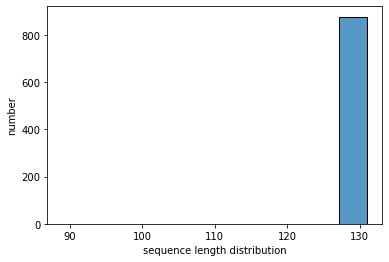

[59, 70, 65, 44, 82, 74, 76, 66, 85, 65, 55, 41, 74, 34, 72, 74, 60, 85, 84, 70, 69, 69, 64, 62, 67, 74, 82, 60, 76, 73, 65, 80, 61, 64, 46, 52, 35, 61, 63, 46, 68, 66, 42, 82, 56, 64, 76, 82, 79, 78, 70, 57, 75, 73, 75, 60, 46, 47, 73, 72, 41, 63, 74, 48, 64, 65, 76, 65, 71, 86, 67, 58, 78, 69, 73, 69, 62, 65, 77, 64, 56, 75, 72, 42, 82, 44, 65, 34, 35, 57, 78, 43, 74, 64, 84, 59, 63, 57, 75, 82, 81, 67, 59, 74, 61, 60, 66, 61, 126, 75, 69, 64, 39, 74, 54, 74, 58, 62, 45, 75, 68, 81, 62, 37, 81, 86, 51, 82, 76, 51, 68, 81, 65, 39, 45, 59, 64, 62, 59, 50, 69, 84, 84, 69, 59, 60, 54, 63, 69, 62, 65, 56, 62, 73, 71, 74, 59, 68, 126, 62, 60, 73, 64, 49, 74, 56, 45, 63, 78, 61, 43, 51, 53, 55, 68, 67, 33, 62, 74, 64, 54, 66, 61, 82, 52, 43, 78, 61, 60, 66, 69, 127, 71, 47, 74, 57, 53, 55, 80, 47, 50, 61, 51, 33, 53, 55, 74, 66, 60, 48, 59, 48, 62, 62, 82, 57, 67, 76, 70, 61, 40, 64, 63, 82, 62, 62, 41, 62, 80, 56, 52, 65, 69, 61, 61, 60, 37, 64, 59, 85, 57, 35, 53, 51, 49, 59, 66, 53, 59, 

([59,
  70,
  65,
  44,
  82,
  74,
  76,
  66,
  85,
  65,
  55,
  41,
  74,
  34,
  72,
  74,
  60,
  85,
  84,
  70,
  69,
  69,
  64,
  62,
  67,
  74,
  82,
  60,
  76,
  73,
  65,
  80,
  61,
  64,
  46,
  52,
  35,
  61,
  63,
  46,
  68,
  66,
  42,
  82,
  56,
  64,
  76,
  82,
  79,
  78,
  70,
  57,
  75,
  73,
  75,
  60,
  46,
  47,
  73,
  72,
  41,
  63,
  74,
  48,
  64,
  65,
  76,
  65,
  71,
  86,
  67,
  58,
  78,
  69,
  73,
  69,
  62,
  65,
  77,
  64,
  56,
  75,
  72,
  42,
  82,
  44,
  65,
  34,
  35,
  57,
  78,
  43,
  74,
  64,
  84,
  59,
  63,
  57,
  75,
  82,
  81,
  67,
  59,
  74,
  61,
  60,
  66,
  61,
  126,
  75,
  69,
  64,
  39,
  74,
  54,
  74,
  58,
  62,
  45,
  75,
  68,
  81,
  62,
  37,
  81,
  86,
  51,
  82,
  76,
  51,
  68,
  81,
  65,
  39,
  45,
  59,
  64,
  62,
  59,
  50,
  69,
  84,
  84,
  69,
  59,
  60,
  54,
  63,
  69,
  62,
  65,
  56,
  62,
  73,
  71,
  74,
  59,
  68,
  126,
  62,
  60,
  73,
  64,
  49,
  74,
  56,
  

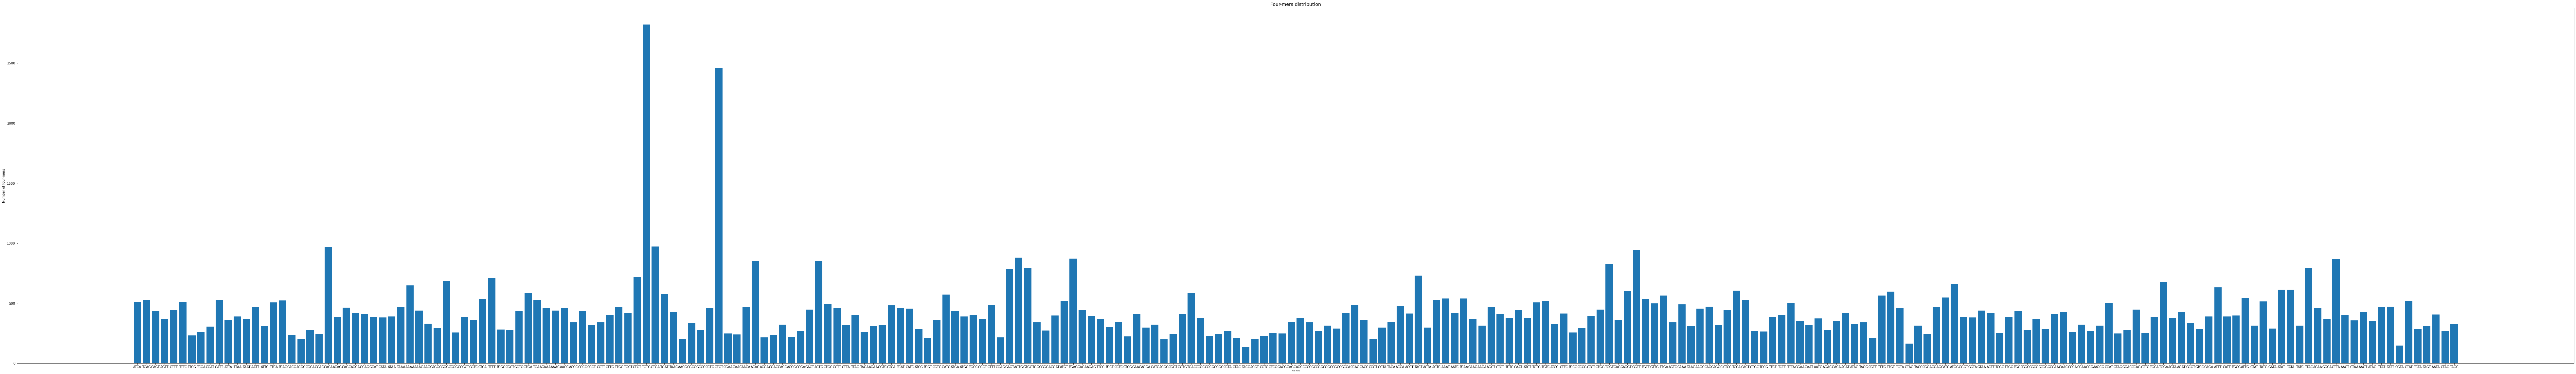

In [9]:
seq_path = FastaStatistics('multi_fasta.fasta')
print(seq_path)
print(seq_path.sequences_number())
seq_path.hist_len_of_sequences()
gc_composition = seq_path.GC_composition()
print(gc_composition)
seq_path.hist_four_mer()
seq_path.output()
